# **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import seaborn as sns
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt

# Library for text processing
# Import libraries
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re

In [ ]:
# Import Files
uploades = files.upload()

Saving re_dataset.csv to re_dataset.csv


In [ ]:
dt_speech = pd.read_csv('re_dataset.csv', encoding = 'latin1')
dt_speech.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [ ]:
dt_speech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


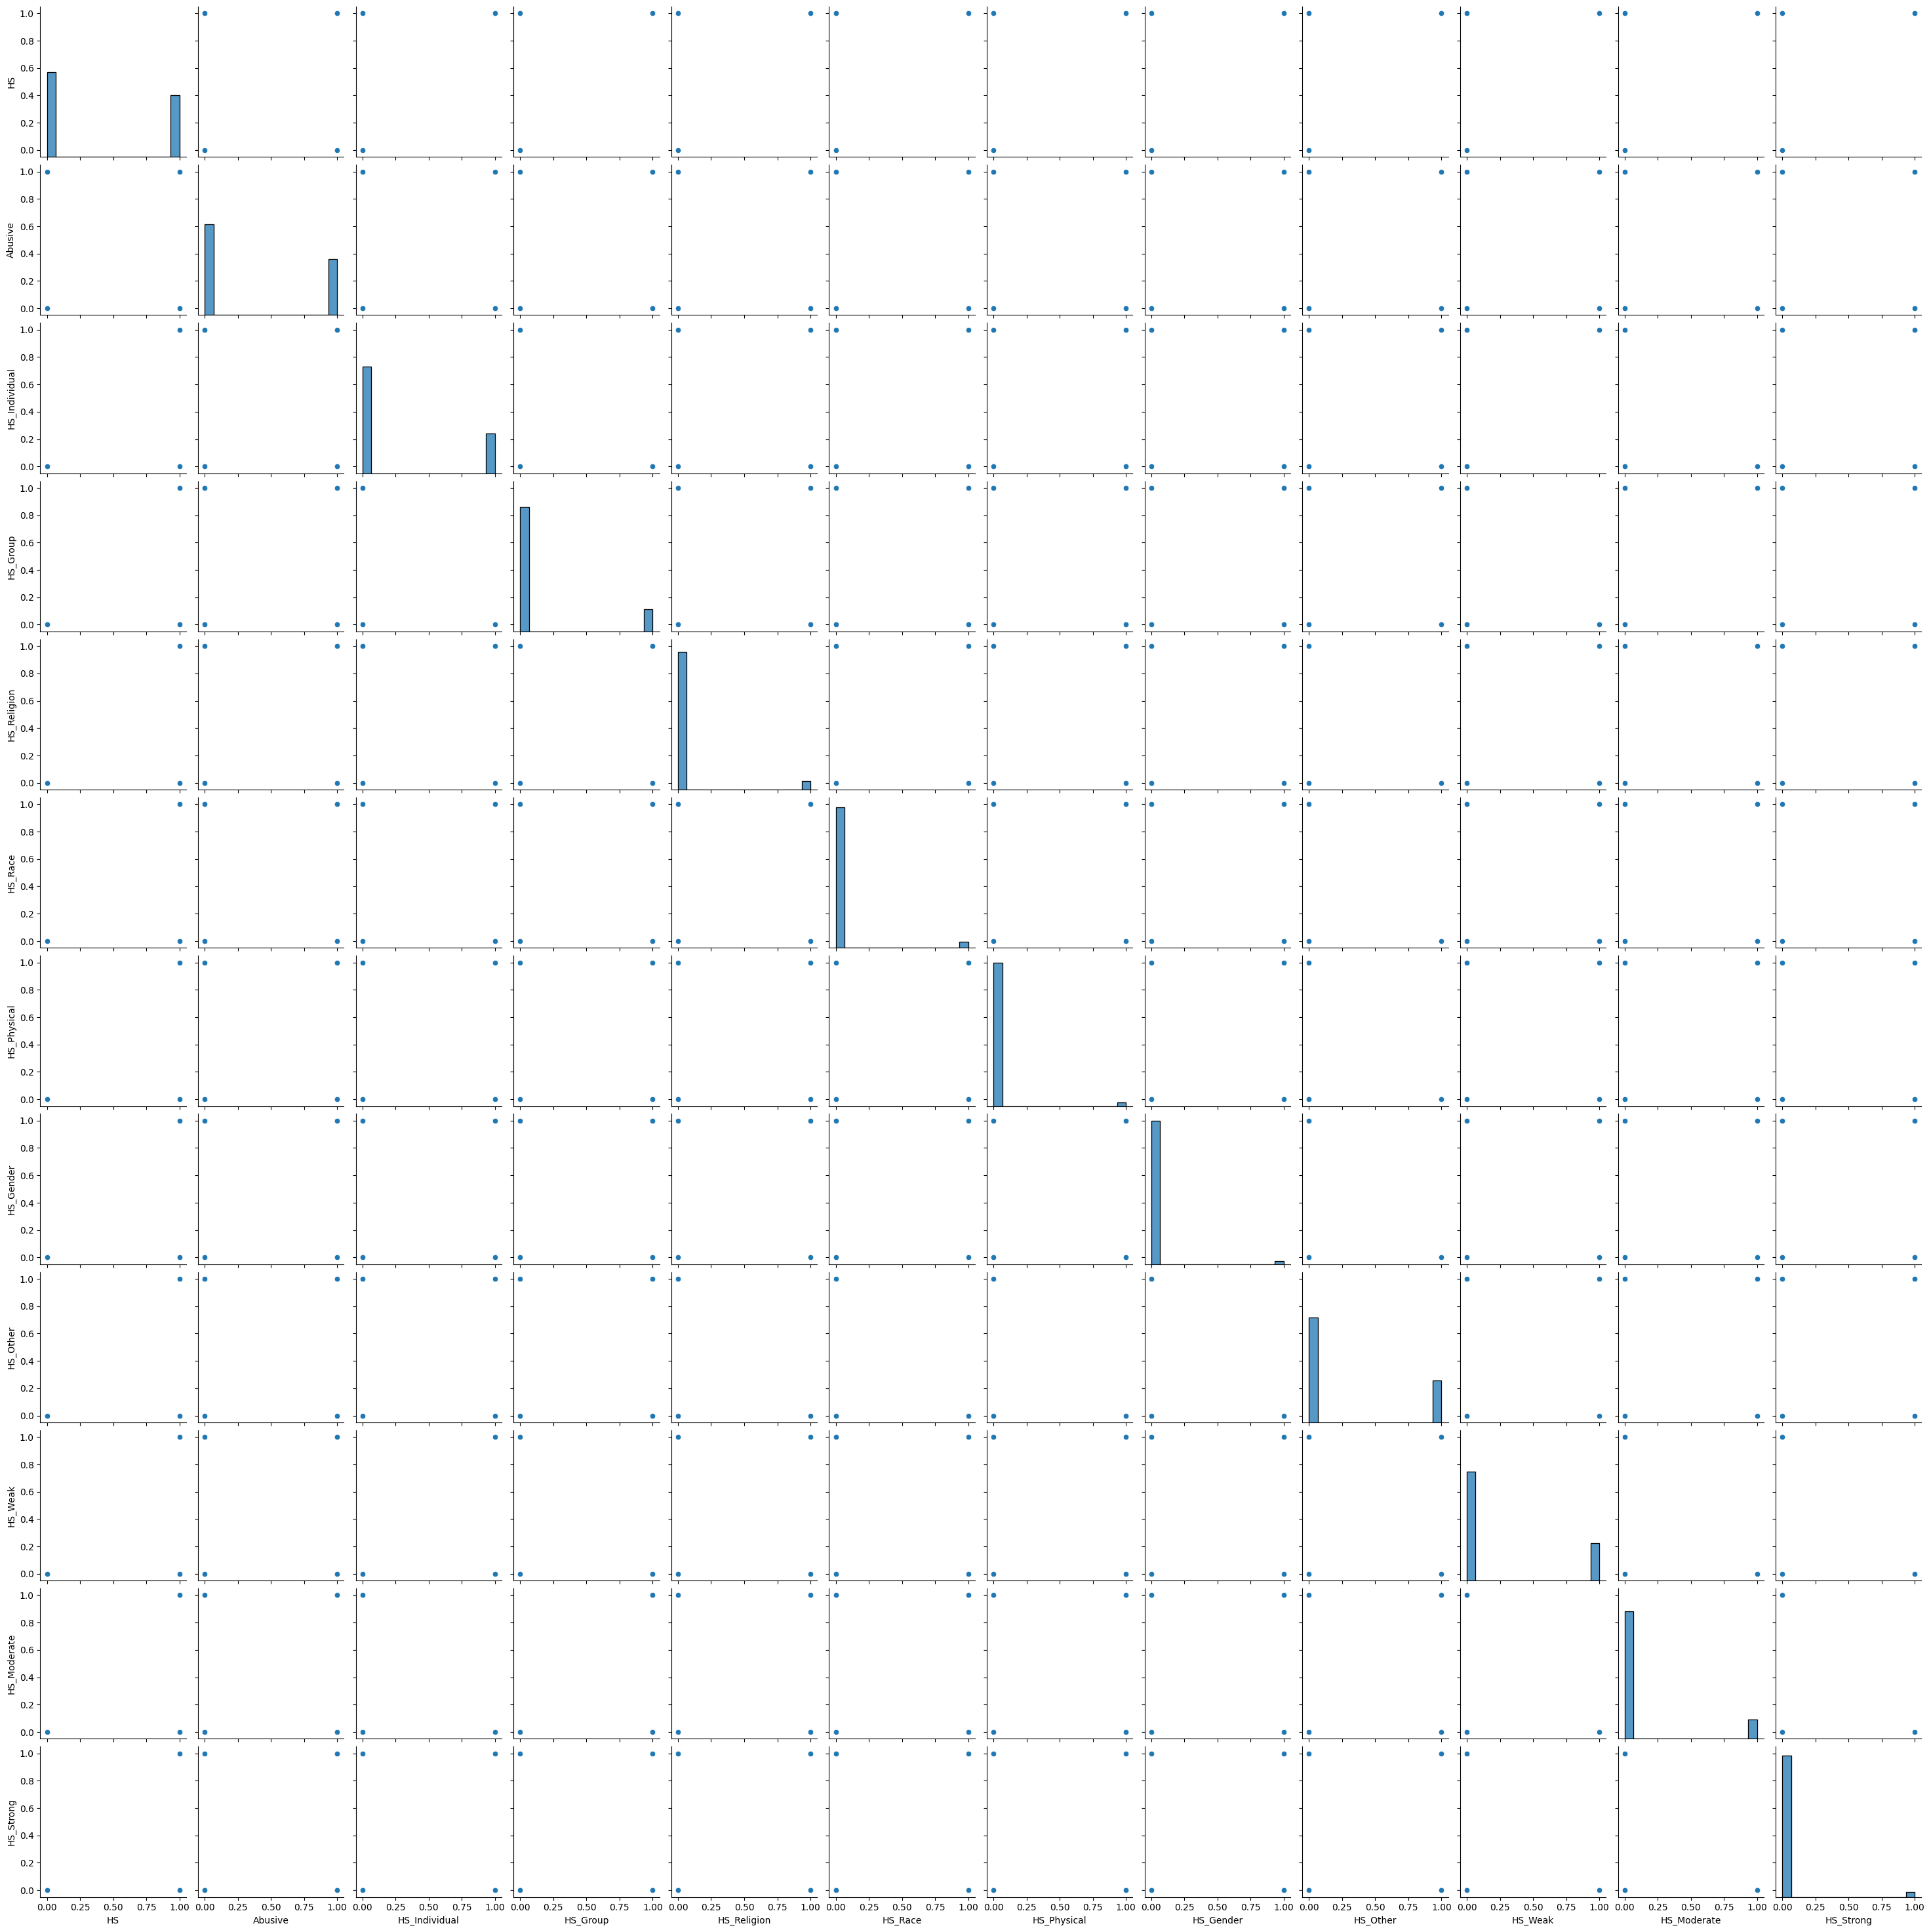

In [ ]:
# value count

sns.pairplot(dt_speech)

Text(0.5, 1.0, 'HS Label')

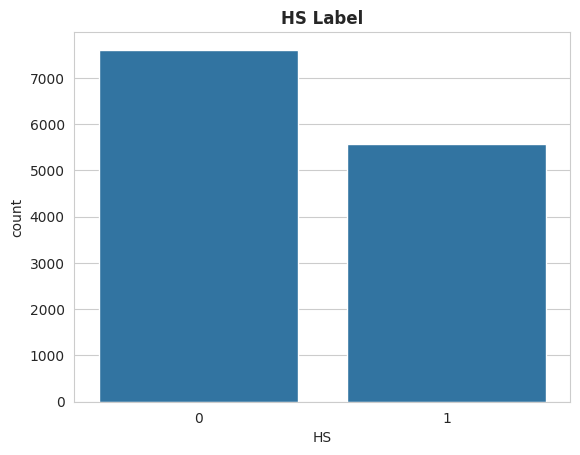

In [ ]:
# Let's check total of label hate speech and not hate speech
sns.set_style('whitegrid')
sns.countplot(x='HS', data=dt_speech)
plt.title('HS Label', fontweight='bold')

In [ ]:
# Check value count
# Check value count
print(dt_speech['HS'].value_counts())

HS
0    7608
1    5561
Name: count, dtype: int64


**Ok, We Have 7608 data not hate speech and 5561 data hate speech**

**Let's go for next step !!**

In [ ]:
# slicing data with .loc (13169 data)

dt_speech_slice = dt_speech.loc[0:13169]
dt_speech_slice

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


## **Text Processing**

In [ ]:
# defined process filtering data
def remove(tweet):
    #remove number
    tweet = re.sub('[0-9]+', '', tweet)

    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)

    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    return tweet

dt_speech_slice['Tweet'] = dt_speech_slice['Tweet'].apply(lambda x: remove(x))
dt_speech_slice.drop_duplicates(subset ="Tweet", keep = 'first', inplace = True)

In [ ]:
dt_speech_slice.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,USER: USER siapa yang telat ngasih tau elu?eda...,0,1,0,0,0,0,0,0,0,0,0,0
2,". Kadang aku berfikir, kenapa aku tetap percay...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
 #import stopword
from nltk.corpus import stopwords
stopwords_indonesia = stopwords.words('indonesian')

#import sastrawi
!pip install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#tokenize
from nltk.tokenize import TweetTokenizer

# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
'''
def clean_tweets(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)

    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    #remove coma
    tweet = re.sub(r',','',tweet)

    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)

    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_indonesia and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

dt_speech_slice['Tweet'] = dt_speech_slice['Tweet'].apply(lambda x: clean_tweets(x))
'''

In [ ]:
# cleaning baru

def clean_tweets(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)

    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    #remove coma
    tweet = re.sub(r',','',tweet)

    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)

    # remove repeated user mentions
    tweet = re.sub(r'(\b\w{3,}\b)(?:.*?\b\1\b)+', r'\1', tweet, flags=re.IGNORECASE)

    # remove leading 'x' characters
    tweet = re.sub(r'\bx+', '', tweet)

    # remove single characters and duplicate characters
    tweet = re.sub(r'\b(\w)\s\1\b|\b(\w)\1\b|\b\w\b', '', tweet)

    # Separating Capital Letters in Words
    tweet = re.sub(r'([a-z])([A-Z])', r'\1 \2', tweet)

    # remove extra whitespace
    tweet = re.sub(r'\s+', ' ', tweet)

    # convert to lowercase
    tweet = tweet.lower()

    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_indonesia and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

dt_speech_slice['Tweet'] = dt_speech_slice['Tweet'].apply(lambda x: clean_tweets(x))

In [ ]:
#remove punct
def remove_punct(text):
    text  = " ".join([char for char in text if char not in string.punctuation])
    return text
dt_speech_slice['Tweet'] = dt_speech_slice['Tweet'].apply(lambda x: remove_punct(x))


In [ ]:
dt_speech_slice.to_csv('output.csv',encoding='utf8', index=False)

In [ ]:
dt_speech_slice.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,cowok bego,1,1,1,0,0,0,0,0,1,1,0,0
1,user telat ngasih tau elu edan sarap gue gaul ...,0,1,0,0,0,0,0,0,0,0,0,0
2,kadang tuhan ninggalkan orangtuaku rencana pis...,0,0,0,0,0,0,0,0,0,0,0,0
3,user nku tau mata sipit liat,0,0,0,0,0,0,0,0,0,0,0,0
4,user kaum cebong kapir udah liat dongok hahahah,1,1,0,1,1,0,0,0,0,0,1,0


In [ ]:
dt_speech_slice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13007 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Tweet          13007 non-null  object  
 1   HS             13007 non-null  category
 2   Abusive        13007 non-null  int64   
 3   HS_Individual  13007 non-null  int64   
 4   HS_Group       13007 non-null  int64   
 5   HS_Religion    13007 non-null  int64   
 6   HS_Race        13007 non-null  int64   
 7   HS_Physical    13007 non-null  int64   
 8   HS_Gender      13007 non-null  int64   
 9   HS_Other       13007 non-null  int64   
 10  HS_Weak        13007 non-null  int64   
 11  HS_Moderate    13007 non-null  int64   
 12  HS_Strong      13007 non-null  int64   
dtypes: category(1), int64(11), object(1)
memory usage: 1.3+ MB


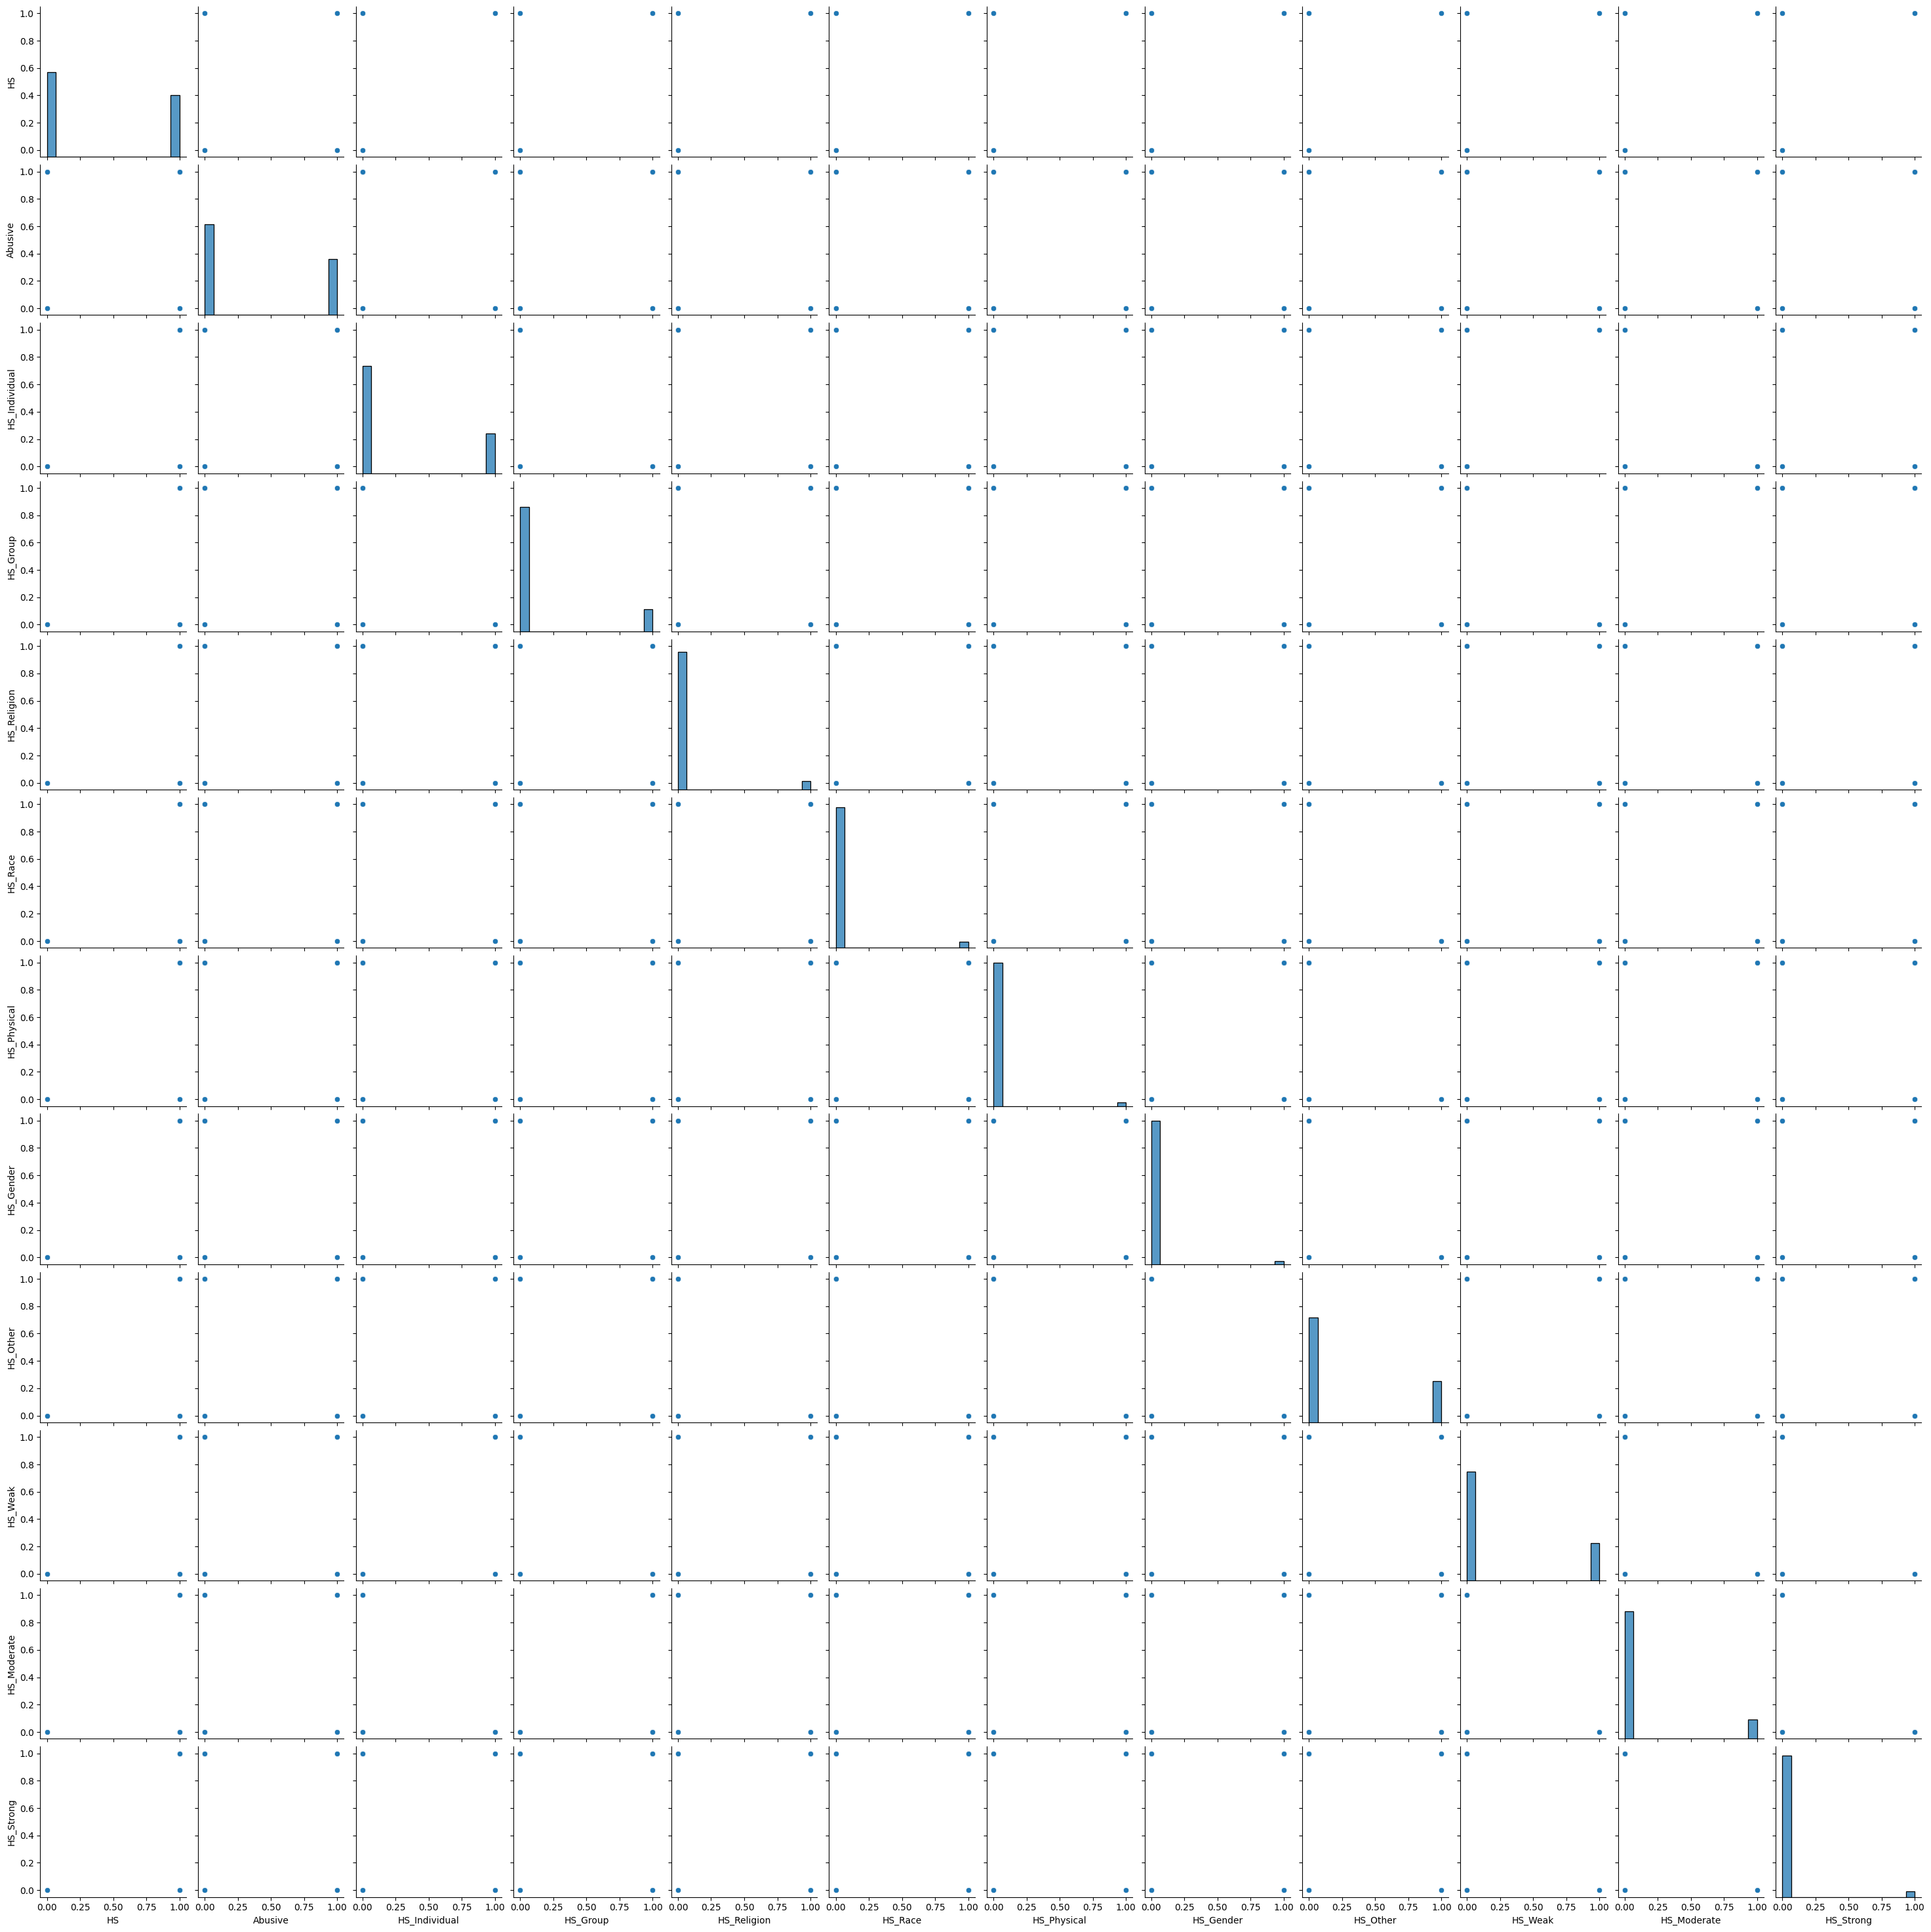

In [ ]:
import seaborn as sns
sns.pairplot(dt_speech_slice)

Text(0.5, 1.0, 'HS Label')

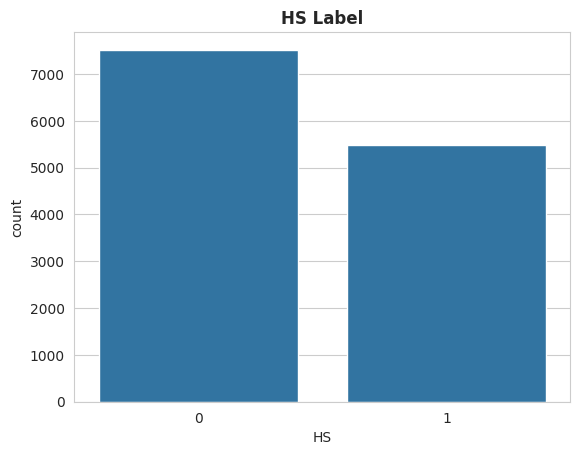

In [ ]:
# Let's check total of label hate speech and not hate speech
sns.set_style('whitegrid')
sns.countplot(x='HS', data=dt_speech_slice)
plt.title('HS Label', fontweight='bold')

In [ ]:
# Check value count
print(dt_speech_slice['HS'].value_counts())

HS
0    7520
1    5487
Name: count, dtype: int64


**After Cleaning, We Have 7520 data not hate speech and 5487 data hate speech**

**Let's go for next step !!**

In [ ]:
dt_speech_slice = dt_speech_slice.astype({'HS' : 'category'})
dt_speech_slice = dt_speech_slice.astype({'Tweet' : 'object'})
dt_speech_slice.dtypes

Tweet              object
HS               category
Abusive             int64
HS_Individual       int64
HS_Group            int64
HS_Religion         int64
HS_Race             int64
HS_Physical         int64
HS_Gender           int64
HS_Other            int64
HS_Weak             int64
HS_Moderate         int64
HS_Strong           int64
dtype: object

In [ ]:
dt_speech_slice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13007 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Tweet          13007 non-null  object  
 1   HS             13007 non-null  category
 2   Abusive        13007 non-null  int64   
 3   HS_Individual  13007 non-null  int64   
 4   HS_Group       13007 non-null  int64   
 5   HS_Religion    13007 non-null  int64   
 6   HS_Race        13007 non-null  int64   
 7   HS_Physical    13007 non-null  int64   
 8   HS_Gender      13007 non-null  int64   
 9   HS_Other       13007 non-null  int64   
 10  HS_Weak        13007 non-null  int64   
 11  HS_Moderate    13007 non-null  int64   
 12  HS_Strong      13007 non-null  int64   
dtypes: category(1), int64(11), object(1)
memory usage: 1.3+ MB


In [ ]:
# proses TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

tvec = CountVectorizer()
X_cVec = tvec.fit_transform(dt_speech_slice['Tweet'].values.astype('U'))
print(X_cVec)
h_tfidf = TfidfTransformer()
x_tfidf = h_tfidf.fit_transform(X_cVec)
print(x_tfidf)
X = dt_speech_slice.Tweet
Y = dt_speech_slice.HS

  (0, 2893)	1
  (0, 1469)	1
  (1, 17533)	1
  (1, 16563)	1
  (1, 10901)	1
  (1, 16469)	1
  (1, 4102)	1
  (1, 3976)	1
  (1, 14732)	1
  (1, 5218)	1
  (1, 4784)	1
  (1, 2701)	1
  (1, 6714)	1
  (1, 2412)	1
  (1, 11669)	1
  (1, 8720)	1
  (2, 7002)	1
  (2, 17190)	1
  (2, 11307)	1
  (2, 12472)	1
  (2, 14164)	1
  (2, 13287)	1
  (2, 7046)	1
  (2, 13230)	1
  (2, 8173)	1
  :	:
  (13003, 17533)	1
  (13003, 4155)	1
  (13003, 8296)	1
  (13003, 7262)	1
  (13004, 17533)	1
  (13004, 5530)	1
  (13004, 1853)	1
  (13004, 0)	1
  (13004, 2047)	1
  (13004, 5850)	1
  (13004, 11489)	1
  (13005, 17533)	1
  (13005, 2012)	1
  (13005, 6752)	1
  (13005, 14254)	1
  (13005, 8588)	1
  (13005, 8239)	1
  (13005, 3046)	1
  (13006, 17533)	1
  (13006, 10901)	1
  (13006, 18046)	1
  (13006, 12420)	1
  (13006, 4541)	1
  (13006, 8325)	1
  (13006, 15518)	1
  (0, 2893)	0.7672096709359892
  (0, 1469)	0.6413963835431962
  (1, 17533)	0.05426076392471241
  (1, 16563)	0.28223526861530907
  (1, 16469)	0.1770613604531551
  (1, 14732)	0.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
#Modelling NaiveBayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

pipeline_nb = Pipeline([
 ('countV', CountVectorizer()),
 ('tfidf', TfidfTransformer()),
 ('classifier', MultinomialNB()),
])

pipeline_nb.fit(X_train,Y_train)
predictions1 = pipeline_nb.predict(X_test)
print(predictions1)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
print(classification_report(predictions1, Y_test))
print(confusion_matrix(predictions1,Y_test))
print ('Accuracy :' ,
round(accuracy_score(predictions1,Y_test)*100,2), "%")
print ('Precision :',
round(precision_score(predictions1,Y_test,
average='weighted')*100,2), "%")
print ('Recall :', round(recall_score(predictions1,Y_test,
average='weighted')*100,2), "%")
print ('f1-score :', round(f1_score(predictions1,Y_test,
average='weighted')*100,2), "%")

[0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1611
           1       0.74      0.80      0.77       991

    accuracy                           0.82      2602
   macro avg       0.81      0.82      0.81      2602
weighted avg       0.82      0.82      0.82      2602

[[1332  279]
 [ 195  796]]
Accuracy : 81.78 %
Precision : 82.21 %
Recall : 81.78 %
f1-score : 81.91 %


In [ ]:
# HypematerTuning GridSearchCV
import numpy as np
from sklearn.model_selection import GridSearchCV

x = x_tfidf
y = dt_speech_slice['HS']
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x, y, test_size = 0.2, random_state = 42, shuffle = True)

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

param_grid = {
    'alpha' : [0.01, 0.1, 0.5, 1, 10] # penghalusan laplace
}

CV_nb = GridSearchCV(estimator=nb, refit = True, verbose = 3, param_grid=param_grid, cv= 5)
CV_nb.fit(X_test2, Y_test2)
CV_nb.best_params_


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ........................alpha=0.01;, score=0.718 total time=   0.0s
[CV 2/5] END ........................alpha=0.01;, score=0.760 total time=   0.0s
[CV 3/5] END ........................alpha=0.01;, score=0.713 total time=   0.0s
[CV 4/5] END ........................alpha=0.01;, score=0.712 total time=   0.0s
[CV 5/5] END ........................alpha=0.01;, score=0.727 total time=   0.0s
[CV 1/5] END .........................alpha=0.1;, score=0.747 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;, score=0.783 total time=   0.0s
[CV 3/5] END .........................alpha=0.1;, score=0.752 total time=   0.0s
[CV 4/5] END .........................alpha=0.1;, score=0.754 total time=   0.0s
[CV 5/5] END .........................alpha=0.1;, score=0.781 total time=   0.0s
[CV 1/5] END .........................alpha=0.5;, score=0.781 total time=   0.0s
[CV 2/5] END .........................alpha=0.5;,

{'alpha': 0.5}

In [ ]:
# Data test with best parameter multinomial NaiveBayes
nb=MultinomialNB(alpha = 0.5)
nb.fit(X_test2, Y_test2)
pred=CV_nb.predict(X_test2)
print(pred)
print(classification_report(Y_test2, pred))

print(confusion_matrix(Y_test2, pred))
print ('Accuracy :' , round(accuracy_score(Y_test2,
pred)*100,2),"%")
print ('Precision :', round(precision_score(Y_test2, pred,
average='weighted')*100,2),"%")
print ('Recall :', round(recall_score(Y_test2, pred,
average='weighted')*100,2), "%")
print ('f1-score :', round(f1_score(Y_test2, pred,
average='weighted')*100,2), "%")

[0 1 0 ... 1 0 0]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1527
           1       0.98      0.93      0.96      1075

    accuracy                           0.97      2602
   macro avg       0.97      0.96      0.97      2602
weighted avg       0.97      0.97      0.97      2602

[[1511   16]
 [  70 1005]]
Accuracy : 96.69 %
Precision : 96.75 %
Recall : 96.69 %
f1-score : 96.68 %


In [ ]:
input = ['dasar kurang ajar']
predictions_nb = pipeline_nb.predict(input)
if (predictions_nb == 0):
  print("Kalimat Tidak Mengandung Hate Speech")
else:
  print("Kalimat Mengandung Hate Speech")

Kalimat Mengandung Hate Speech


In [ ]:
# Modelling Metode SVM
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
 ('countV', CountVectorizer()),
 ('tfidf', TfidfTransformer()),
 ('classifier', SVC()),
])

pipeline.fit(X_train,Y_train)
predictions = pipeline.predict(X_test)
print(predictions)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
print(classification_report(predictions, Y_test))

print(confusion_matrix(predictions,Y_test))
print ('Accuracy :' ,
round(accuracy_score(predictions,Y_test)*100,2), "%")
print ('Precision :',
round(precision_score(predictions,Y_test,
average='weighted')*100,2), "%")
print ('Recall :', round(recall_score(predictions,Y_test,
average='weighted')*100,2), "%")
print ('f1-score :', round(f1_score(predictions,Y_test,
average='weighted')*100,2), "%")

[0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1616
           1       0.75      0.82      0.78       986

    accuracy                           0.83      2602
   macro avg       0.82      0.82      0.82      2602
weighted avg       0.83      0.83      0.83      2602

[[1346  270]
 [ 181  805]]
Accuracy : 82.67 %
Precision : 83.12 %
Recall : 82.67 %
f1-score : 82.8 %


In [ ]:
#Hyperparameter GridSearchCV
x = x_tfidf
y = dt_speech_slice['HS']
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x, y, test_size = 0.2, random_state = 42, shuffle = True)

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
sv=SVC(random_state=42)

param_grid = {
 'C' : [0.1, 1, 10, 100],
 'gamma' : ['auto'],
 'kernel' : ['rbf', 'poly', 'sigmoid', 'linear']
}

CV_sv = GridSearchCV(estimator=sv, refit = True, verbose = 3, param_grid=param_grid, cv= 5)
CV_sv.fit(X_test2, Y_test2)
CV_sv.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.587 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.587 total time=   0.6s
[CV 3/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.587 total time=   0.6s
[CV 4/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.587 total time=   0.6s
[CV 5/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.587 total time=   0.6s
[CV 1/5] END ....C=0.1, gamma=auto, kernel=poly;, score=0.587 total time=   0.4s
[CV 2/5] END ....C=0.1, gamma=auto, kernel=poly;, score=0.587 total time=   0.4s
[CV 3/5] END ....C=0.1, gamma=auto, kernel=poly;, score=0.587 total time=   0.4s
[CV 4/5] END ....C=0.1, gamma=auto, kernel=poly;, score=0.587 total time=   0.4s
[CV 5/5] END ....C=0.1, gamma=auto, kernel=poly;, score=0.587 total time=   0.4s
[CV 1/5] END .C=0.1, gamma=auto, kernel=sigmoid;, score=0.587 total time=   0.4s
[CV 2/5] END .C=0.1, gamma=auto, kernel=sigmoid;

{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}

In [ ]:
#Testing SVM
sv1=SVC(random_state=42, C = 1, gamma = 'auto', kernel = 'linear')
sv1.fit(X_test2, Y_test2)
pred=CV_sv.predict(X_test2)
print(pred)
print(classification_report(Y_test2, pred))

print(confusion_matrix(Y_test2, pred))
print ('Accuracy :' , round(accuracy_score(Y_test2,
pred)*100,2),"%")
print ('Precision :', round(precision_score(Y_test2, pred,
average='weighted')*100,2),"%")
print ('Recall :', round(recall_score(Y_test2, pred,
average='weighted')*100,2), "%")
print ('f1-score :', round(f1_score(Y_test2, pred,
average='weighted')*100,2), "%")

[0 1 0 ... 1 0 0]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1527
           1       0.97      0.95      0.96      1075

    accuracy                           0.97      2602
   macro avg       0.97      0.96      0.97      2602
weighted avg       0.97      0.97      0.97      2602

[[1491   36]
 [  52 1023]]
Accuracy : 96.62 %
Precision : 96.62 %
Recall : 96.62 %
f1-score : 96.61 %


In [ ]:
input = ['cantik banget tuh anak']
predictions = pipeline.predict(input)
if (predictions== 0):
  print("Kalimat Tidak Mengandung Hate Speech")
else:
  print("Kalimat Mengandung Hate Speech")

Kalimat Tidak Mengandung Hate Speech


In [ ]:
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

pipeline2 = Pipeline([
 ('countV', CountVectorizer()),
 ('tfidf', TfidfTransformer()),
 ('classifier', RandomForestClassifier(random_state=42)),
])

pipeline2.fit(X_train,Y_train)
predictions = pipeline2.predict(X_test)
print(predictions)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
print(classification_report(predictions, Y_test))

print(confusion_matrix(predictions,Y_test))
print ('Accuracy :' ,
round(accuracy_score(predictions,Y_test)*100,2), "%")
print ('Precision :',
round(precision_score(predictions,Y_test,
average='weighted')*100,2), "%")
print ('Recall :', round(recall_score(predictions,Y_test,
average='weighted')*100,2), "%")
print ('f1-score :', round(f1_score(predictions,Y_test,
average='weighted')*100,2), "%")
'''

[0 1 0 ... 1 1 0]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      3268
           1       0.75      0.83      0.79      1935

    accuracy                           0.83      5203
   macro avg       0.82      0.83      0.82      5203
weighted avg       0.84      0.83      0.83      5203

[[2718  550]
 [ 322 1613]]
Accuracy : 83.24 %
Precision : 83.89 %
Recall : 83.24 %
f1-score : 83.4 %


In [ ]:
'''
x = x_tfidf
y = dt_speech_slice['HS']
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x, y, test_size = 0.2, random_state = 42, shuffle = True)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)

param_grid = {
 'n_estimators' : [300, 400, 500],
 'criterion' : ['gini', 'entropy'],
 'max_depth' : [10, 20, 30, 40, 50],
 'class_weight' : ['balanced', 'balanced_subsample']
}

RFC_rf = GridSearchCV(estimator=rfc, refit = True, verbose = 3, param_grid=param_grid, cv= 5)
RFC_rf.fit(X_test2, Y_test2)
RFC_rf.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=10, n_estimators=300;, score=0.804 total time=   2.0s
[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=10, n_estimators=300;, score=0.827 total time=   2.1s
[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=10, n_estimators=300;, score=0.771 total time=   1.4s
[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=10, n_estimators=300;, score=0.771 total time=   1.4s
[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=10, n_estimators=300;, score=0.827 total time=   1.4s
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=10, n_estimators=400;, score=0.797 total time=   1.9s
[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=10, n_estimators=400;, score=0.827 total time=   1.8s
[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=10, n_estimators=400;, score=0.775 total time=   1.8s
[CV 4/5] E

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': 50,
 'n_estimators': 300}

In [ ]:
'''
from sklearn.ensemble import RandomForestClassifier


In [ ]:
'''
rfc1=RandomForestClassifier(random_state=42, n_estimators = 500, class_weight = 'balanced_subsample', criterion = 'gini', max_depth = 20)
rfc1.fit(X_test2, Y_test2)
pred=RFC_rf.predict(X_test2)
print(pred)
print(classification_report(Y_test2, pred))

print(confusion_matrix(Y_test2, pred))
print ('Accuracy :' , round(accuracy_score(Y_test2,
pred)*100,2),"%")
print ('Precision :', round(precision_score(Y_test2, pred,
average='weighted')*100,2),"%")
print ('Recall :', round(recall_score(Y_test2, pred,
average='weighted')*100,2), "%")
print ('f1-score :', round(f1_score(Y_test2, pred,
average='weighted')*100,2), "%")

[0 1 0 ... 1 0 0]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1527
           1       1.00      0.92      0.96      1075

    accuracy                           0.97      2602
   macro avg       0.97      0.96      0.96      2602
weighted avg       0.97      0.97      0.97      2602

[[1527    0]
 [  88  987]]
Accuracy : 96.62 %
Precision : 96.8 %
Recall : 96.62 %
f1-score : 96.59 %


In [ ]:
input = ['Dasar Dongo Luh']
predictions3 = pipeline.predict(input)
print(predictions3)

[1]
